Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#### Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


#### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
#### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
#### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
#### The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [3]:
res = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [4]:
sec_yr = list()
for i in range(1880, 2051):
    sec_yr.append(i)
sec_yr = pd.Series(sec_yr)
thrd_yr = list()
for i in range(2000, 2051):
    thrd_yr.append(i)
thrd_yr = pd.Series(thrd_yr)

In [5]:
mask = df['Year'] >= 2000
n_df = df[mask]
res_2 = stats.linregress(n_df['Year'], n_df['CSIRO Adjusted Sea Level'])
n_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


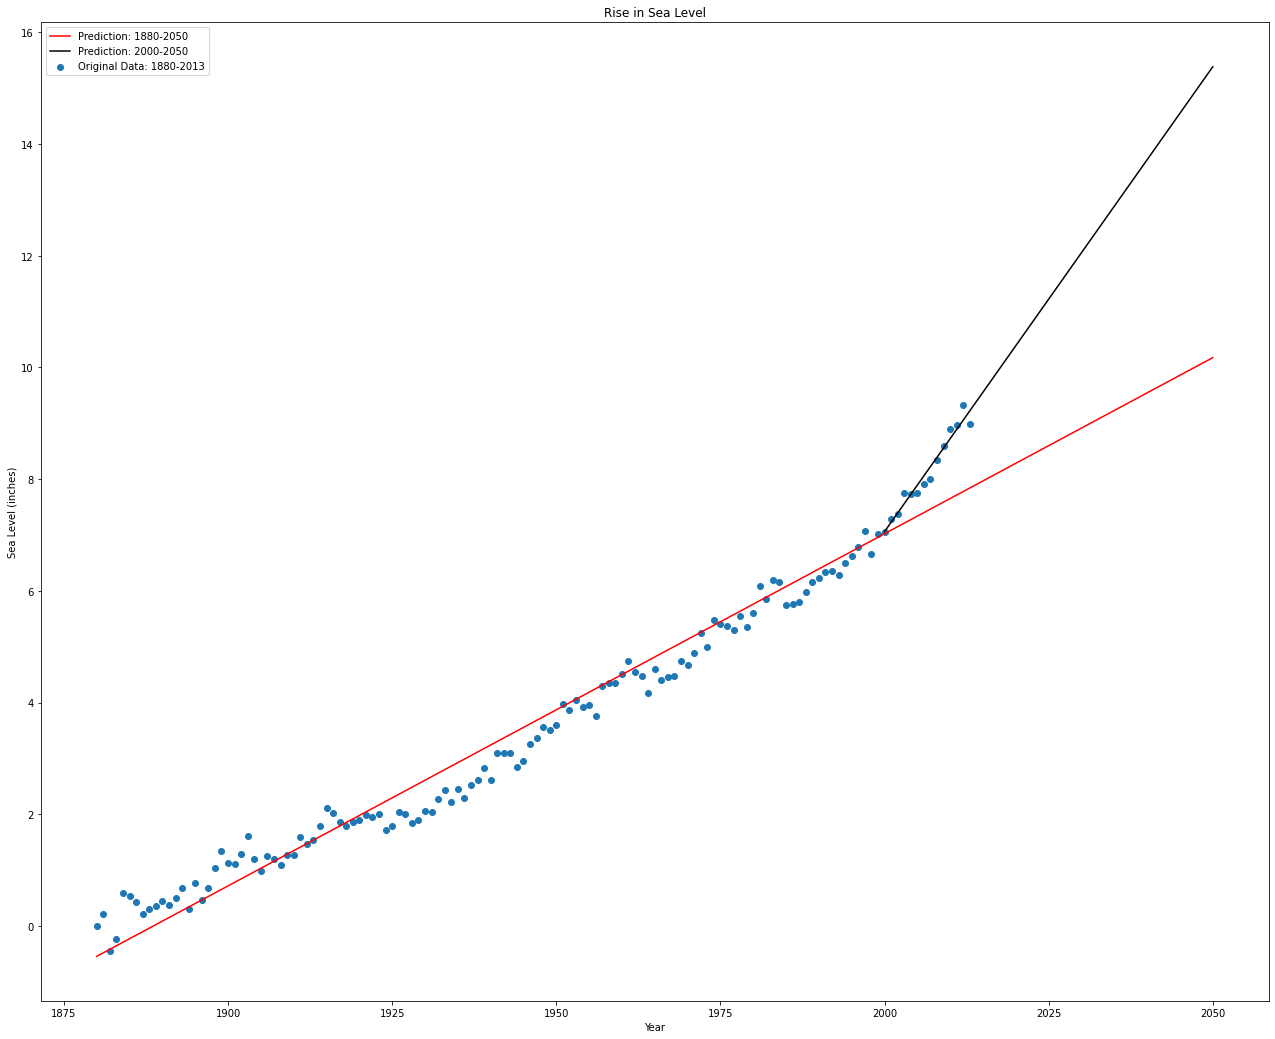

In [6]:
plt.figure(figsize=(22, 18))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(sec_yr, res.intercept + res.slope*sec_yr, 'r')
plt.plot(thrd_yr, res_2.intercept + res_2.slope*thrd_yr, 'black')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

plt.title("Rise in Sea Level")

plt.legend(['Prediction: 1880-2050', 'Prediction: 2000-2050', 'Original Data: 1880-2013']);